In [2]:
import numpy as np
import pandas as pd 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random
import os

PATH = 'D:/data/train/'

In [35]:
filenames = os.listdir(PATH)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

data = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

data.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [10]:
data.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


data length: 25000


<AxesSubplot: >

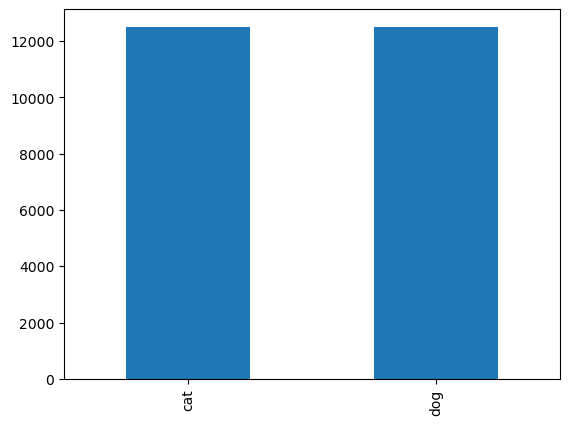

In [11]:
print("data length:", len(data))

data['category'].replace({0: 'cat', 1: 'dog'}).value_counts().plot.bar()

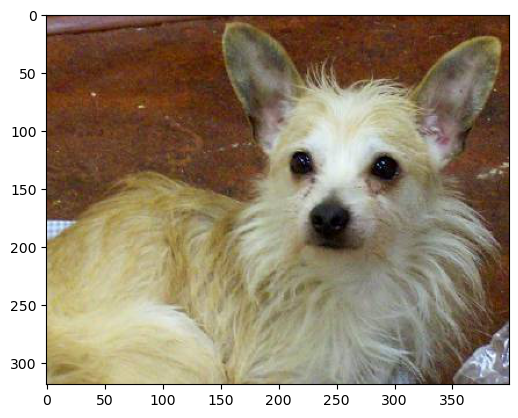

In [23]:
from tensorflow.keras.preprocessing.image import load_img

sample = random.choice(filenames)
image = load_img(PATH + sample)
plt.imshow(image)

In [28]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=333)
print(len(train_data), len(test_data)) # train.shape[0], test.shape[0]


20000 5000


In [42]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_Gen = ImageDataGenerator (
    rescale = 1./255.,
    horizontal_flip = True,         # 수평선을 기준으로 반전
    vertical_flip = True,           # 수직선을 기준으로 반전
    width_shift_range = 0.1,        # 10% 만큼 가로 이동
    height_shift_range = 0.1,       # 10% 만큼 세로 이동
    rotation_range = 5,             # 회전
    zoom_range = 0.2,               # 확대
    shear_range = 0.2,              # 엇갈림
    fill_mode = 'nearest'  
    )

train_Gen = train_data_Gen.flow_from_directory (
    'D:/data/train/',
    target_size=(128, 128),         
    batch_size=20,
    class_mode='categorical'
)

test_data_Gen = ImageDataGenerator (
    rescale = 1./255.
    )

test_Gen = train_data_Gen.flow_from_directory (
    'D:/data//',
    target_size=(128, 128),       
    batch_size=20,
    class_mode='categorical'
)

import matplotlib.pyplot as plt

img = train_data[0] 
plt.figure(figsize=(20, 5))
for i, img in enumerate(img[0]):
    plt.subplot(1, 10, i+1)
    plt.title('%.2f' % img[1][i])
    plt.axis('off') # 축 표시 X
    plt.imshow() #차원 = 1인 차원을 제거

Found 0 images belonging to 0 classes.
Found 37500 images belonging to 2 classes.


KeyError: 0

In [48]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Sequential
model = Sequential()

model.add(Conv2D(64, (2,2), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (2,2), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (2,2), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (2,2), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(32))
model.add(Dense(2))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 128)      

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

ES = EarlyStopping(monitor='val_acc', 
                   mode='auto',
                   patience=8,
                   restore_best_weights=True)

MCP = ModelCheckpoint(monitor='val_acc', 
                      mode='auto',
                      save_best_only=True,
                      filepath = PATH + 'cat_dog_ModelCheckPoint.hdf5') 

LR = ReduceLROnPlateau(monitor='val_acc', 
                       patience=2, 
                       verbose=1, 
                       factor=0.5, 
                       min_lr=0.00001)